In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats
import math

In [3]:
excel_file = 'online_retail_II.xlsx'
dfs = []  
xls = pd.ExcelFile(excel_file)


In [4]:
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    dfs.append(df)


In [5]:
sales_df = pd.concat(dfs, axis=0, ignore_index=True)

In [6]:
df=sales_df.copy()

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     243007
Country             0
dtype: int64

In [8]:
df['InvoiceNo'].nunique()

53628

In [9]:
df['CustomerID'].nunique()

5942

#### The Invoice numbers out-scale the CustomerID 10:1 thus we need to explore a way to fill in the missing IDs

In [10]:
df.drop_duplicates(inplace=True)
#df['CustomerID'] = df['CustomerID'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month_Year']  = df['InvoiceDate'].dt.strftime('%Y-%m')
#df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033036 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   CustomerID   797885 non-null   float64       
 7   Country      1033036 non-null  object        
 8   Month_Year   1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 78.8+ MB


In [11]:
df.shape

(1033036, 9)

# Data Cleaning

## Are there any relationships betweem the missing Customer IDs and any other tab?

##### 1. Description field has 4382 nulls where the customer ID is also missing. This could be account reconciliation

In [12]:
df[(df['CustomerID'].isnull())&(df['Description'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
470,519017,22759,NaN,-9600,2010-08-13 09:14:00,0.0,NaN,United Kingdom,2010-08
3114,504311,22197,NaN,-9200,2010-04-12 14:39:00,0.0,NaN,United Kingdom,2010-04
3161,531178,22126,NaN,-6400,2010-11-05 14:40:00,0.0,NaN,United Kingdom,2010-11
3731,519016,22752,NaN,-6000,2010-08-13 09:13:00,0.0,NaN,United Kingdom,2010-08
4296,519018,22753,NaN,-5000,2010-08-13 09:15:00,0.0,NaN,United Kingdom,2010-08
...,...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,2011-12
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,2011-12
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,2011-12
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,2011-12


In [13]:
df = df[df['Description'].notnull()]
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1028761.0,1028761,1028761,1.028761e+06,1028761,1.028761e+06,797885.000000,1028761,1028761
unique,49353.0,4950,5698,NaN,45111,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1114.0,5653,5740,NaN,1114,NaN,NaN,944046,83268
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.019092e+01,NaN,4.633153e+00,15313.062777,NaN,NaN
std,NaN,NaN,NaN,1.723738e+02,NaN,1.226512e+02,1696.466663,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13964.000000,NaN,NaN


In [14]:
df[df['Price']==0].describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1739.0,1739.0,1739,1739.000000,1739,1739.0,70.000000,1739,1739
unique,1104.0,959.0,612,NaN,1002,NaN,NaN,11,25
top,539856.0,21116.0,check,NaN,2010-12-22 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,63.0,14.0,160,NaN,63,NaN,NaN,1712,191
first,NaN,NaN,NaN,NaN,2009-12-01 10:52:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-08 15:24:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-140.489937,NaN,0.0,14234.157143,NaN,NaN
std,NaN,NaN,NaN,872.155420,NaN,0.0,1696.395186,NaN,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,0.0,12415.000000,NaN,NaN
25%,NaN,NaN,NaN,-62.000000,NaN,0.0,12748.000000,NaN,NaN


Price being 0 might indicate an error. This can be solved by asking the store merchants or looking at the original invoices as this could possibly be a human error in capturing the information depending on how the original data was created (printed invoice vs. electronic origination)

The Price = 0 was found to be accounting recording of damaged items

In [15]:
df = df[df['Price']!=0]
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1027022.0,1027022,1027022,1.027022e+06,1027022,1.027022e+06,797815.000000,1027022,1027022
unique,48374.0,4932,5415,NaN,44345,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1114.0,5645,5735,NaN,1114,NaN,NaN,942334,83077
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.044606e+01,NaN,4.640998e+00,15313.157440,NaN,NaN
std,NaN,NaN,NaN,1.686336e+02,NaN,1.227549e+02,1696.437628,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13964.000000,NaN,NaN


In [16]:
df = df[(df['Price']>0)]
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1027017.0,1027017,1027017,1.027017e+06,1027017,1.027017e+06,797815.000000,1027017,1027017
unique,48369.0,4932,5415,NaN,44341,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1114.0,5645,5735,NaN,1114,NaN,NaN,942329,83077
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.044611e+01,NaN,4.795523e+00,15313.157440,NaN,NaN
std,NaN,NaN,NaN,1.686340e+02,NaN,9.310805e+01,1696.437628,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,1.000000e-03,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13964.000000,NaN,NaN


In [17]:
df = df[(df['StockCode']!='DOT') & (df['StockCode']!='POST')]
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1023520.0,1023520,1023520,1.023520e+06,1023520,1.023520e+06,795816.000000,1023520,1023520
unique,48099.0,4930,5413,NaN,44111,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1113.0,5645,5735,NaN,1113,NaN,NaN,940675,82844
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.047547e+01,NaN,4.442215e+00,15319.227264,NaN,NaN
std,NaN,NaN,NaN,1.689210e+02,NaN,9.159535e+01,1693.516231,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,1.000000e-03,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13971.000000,NaN,NaN


In [18]:
df = df[(df['CustomerID'].notnull()) | (df['Quantity']>0)]

In [19]:
df[(df['StockCode']!='M') | (df['CustomerID'].notnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12


In [20]:
df = df[(df['StockCode']!='D') & (df['StockCode']!='S') & ((df['StockCode']!='M') | (df['CustomerID'].notnull()))]

In [21]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1022519.0,1022519,1022519,1.022519e+06,1022519,1.022519e+06,795646.000000,1022519,1022519
unique,47440.0,4928,5411,NaN,43540,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1113.0,5644,5734,NaN,1113,NaN,NaN,939798,82808
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.049200e+01,NaN,3.887636e+00,15319.287801,NaN,NaN
std,NaN,NaN,NaN,1.689997e+02,NaN,6.479715e+01,1693.576125,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,1.000000e-03,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13971.000000,NaN,NaN


In [22]:
df = df[~df['Description'].str.contains(r'\bfee\b', regex=True, case=False, na=False)]

In [23]:
df = df[~(df['Description'].str.contains('Bank Charges', case=False, na=False)) ]


In [24]:
df[df['CustomerID'].isnull()].describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,226867.0,226867,226867,226867.000000,226867,226867.000000,0.0,226867,226867
unique,2928.0,4381,4580,NaN,2711,NaN,NaN,14,25
top,573585.0,85099B,JUMBO BAG RED RETROSPOT,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1113.0,746,671,NaN,1113,NaN,NaN,224044,18790
first,NaN,NaN,NaN,NaN,2009-12-01 11:49:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 10:26:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.038851,NaN,4.810806,NaN,NaN,NaN
std,NaN,NaN,NaN,12.308507,NaN,26.247505,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.060000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.660000,NaN,NaN,NaN


In [25]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1022476.0,1022476,1022476,1.022476e+06,1022476,1.022476e+06,795609.000000,1022476,1022476
unique,47398.0,4926,5408,NaN,43505,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1113.0,5644,5734,NaN,1113,NaN,NaN,939756,82806
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.049241e+01,NaN,3.867156e+00,15319.274654,NaN,NaN
std,NaN,NaN,NaN,1.690033e+02,NaN,6.305252e+01,1693.581424,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,1.000000e-03,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13971.000000,NaN,NaN


In [26]:
df[df['StockCode'].str.contains('gift', regex=True, case=False, na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom,2009-12
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom,2009-12
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom,2009-12
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom,2009-12
41263,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,NaN,United Kingdom,2009-12
...,...,...,...,...,...,...,...,...,...
842903,564760,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-30 10:47:00,25.00,NaN,United Kingdom,2011-08
845901,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom,2011-08
847625,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom,2011-09
956810,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom,2011-10


In [27]:
df[df['InvoiceNo'].str.contains('C', regex=True, case=False, na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009-12
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009-12
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009-12
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009-12
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009-12
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011-12
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011-12
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011-12
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011-12


In [28]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009-12
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009-12
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009-12
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009-12
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009-12
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011-12
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011-12
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011-12
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011-12


In [29]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1022476.0,1022476,1022476,1.022476e+06,1022476,1.022476e+06,795609.000000,1022476,1022476
unique,47398.0,4926,5408,NaN,43505,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1113.0,5644,5734,NaN,1113,NaN,NaN,939756,82806
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.049241e+01,NaN,3.867156e+00,15319.274654,NaN,NaN
std,NaN,NaN,NaN,1.690033e+02,NaN,6.305252e+01,1693.581424,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,1.000000e-03,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13971.000000,NaN,NaN


### We want to index the missing IDs so that we can replace those missing values
We want to index the missing values by the invoice date as this indicates that they're the same person

In [30]:
df = df.sort_values(by=['InvoiceDate'])

existing_ids=[]
existing_ids = set(df['CustomerID'].dropna())

# Identify the specific range of customer IDs
min_customer_id = 12346

# Group by 'InvoiceDate' and count null values in 'CustomerID' column
List_missing_IDs = df.groupby('InvoiceDate')['CustomerID'].apply(lambda x: x.isnull().sum())

missing_ids = []
new_ID = min_customer_id
# Iterate through the index and value of the Series using 'items' method
for date, missing_count in List_missing_IDs.items():
    if new_ID in existing_ids:
        new_ID +=1
    else:
        missing_ids.append(new_ID)
        new_ID +=1

for date, count in List_missing_IDs.items():
    if count > 0:
        mask = (df['InvoiceDate'] == date) & (df['CustomerID'].isnull())
        df.loc[mask, 'CustomerID'] = missing_ids.pop(0)

In [31]:
# We assign the entries with negative quantity (returns) int o a seperate dataframe
returns_df = df[(df['Quantity']<0) | (df['Price']<0)]
returns_df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,18039,18039,18039,18039.000000,18039,18039.000000,18039.000000,18039,18039
unique,7646,2847,3022,NaN,7505,NaN,NaN,31,25
top,C570867,M,Manual,NaN,2011-10-12 16:17:00,NaN,NaN,United Kingdom,2010-11
freq,101,397,397,NaN,101,NaN,NaN,15411,1149
first,NaN,NaN,NaN,NaN,2009-12-01 10:33:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 11:58:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-26.035534,NaN,23.318051,15012.375132,NaN,NaN
std,NaN,NaN,NaN,833.943449,NaN,427.599578,1699.684215,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.030000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,-6.000000,NaN,1.450000,13547.000000,NaN,NaN


In [32]:
# Now we want to have a dataframe with only the purchase values:
sales_df = df[(df['Quantity']>=0) & (df['Price']>=0)]
sales_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1004437.0,1004437,1004437,1.004437e+06,1004437,1.004437e+06,1.004437e+06,1004437,1004437
unique,39752.0,4911,5392,NaN,36928,NaN,NaN,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,2011-11
freq,1113.0,5511,5601,NaN,1113,NaN,NaN,924345,81790
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.114842e+01,NaN,3.517832e+00,1.633915e+04,NaN,NaN
std,NaN,NaN,NaN,1.286908e+02,NaN,2.750591e+01,2.428512e+03,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,1.000000e-03,1.234600e+04,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,1.436500e+04,NaN,NaN


In [33]:
sales_df['CustomerID'] = sales_df['CustomerID'].astype(str)
sales_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month_Year
count,1004437.0,1004437,1004437,1.004437e+06,1004437,1.004437e+06,1004437,1004437,1004437
unique,39752.0,4911,5392,NaN,36928,NaN,8588,43,25
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,17841.0,United Kingdom,2011-11
freq,1113.0,5511,5601,NaN,1113,NaN,12435,924345,81790
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.114842e+01,NaN,3.517832e+00,NaN,NaN,NaN
std,NaN,NaN,NaN,1.286908e+02,NaN,2.750591e+01,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,1.000000e-03,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,NaN,NaN,NaN


In [64]:
df.to_csv('cleaned_data.csv',index=False)

#### LOoking for outliers

<Axes: xlabel='Quantity'>

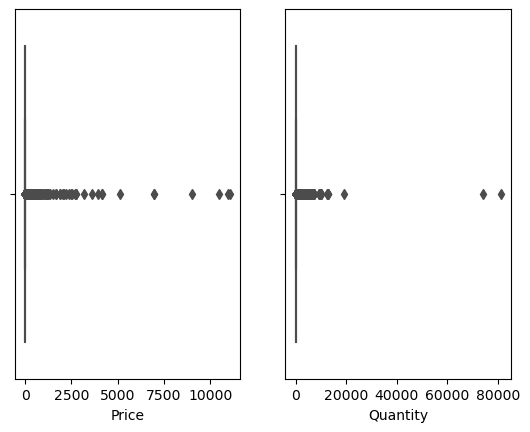

In [34]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=sales_df,x=sales_df['Price'],color='red',ax=axs[0])
sns.boxplot(data=sales_df,x=sales_df['Quantity'],color='red',ax=axs[1])

<Axes: xlabel='Quantity', ylabel='Density'>

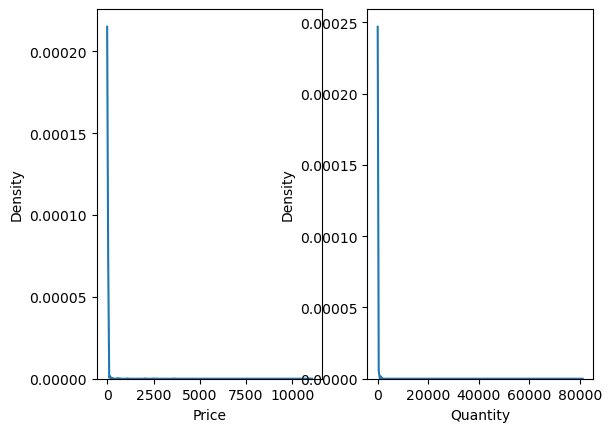

<Figure size 2000x800 with 0 Axes>

In [35]:
fig, axs = plt.subplots(ncols=2)
plt.figure(figsize=(20,8))
sns.kdeplot(data=sales_df,x=sales_df['Price'],ax=axs[0])
sns.kdeplot(data=sales_df,x=sales_df['Quantity'],ax=axs[1])

### Scatter plot to see relationship between price & quantity

In [50]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

prices = np.array(sales_df['Price']).reshape(-1, 1)
quantities = np.array(sales_df['Quantity']).reshape(-1, 1)

In [55]:
scaled_prices = scalar.fit_transform(prices)
scaled_quantities = scalar.fit_transform(quantities)

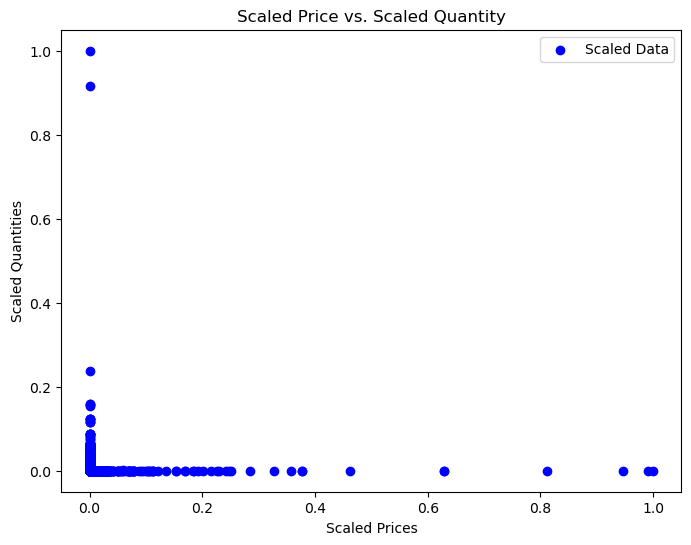

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_prices, scaled_quantities, color='blue', label='Scaled Data')
plt.xlabel('Scaled Prices')
plt.ylabel('Scaled Quantities')
plt.title('Scaled Price vs. Scaled Quantity')
plt.legend()
plt.show()


In [57]:
logistic_transform = lambda x: 1 / (1 + np.exp(-x))
transformed_quantities = logistic_transform(scaled_quantities)



In [59]:
transformed_prices = logistic_transform(scaled_prices)

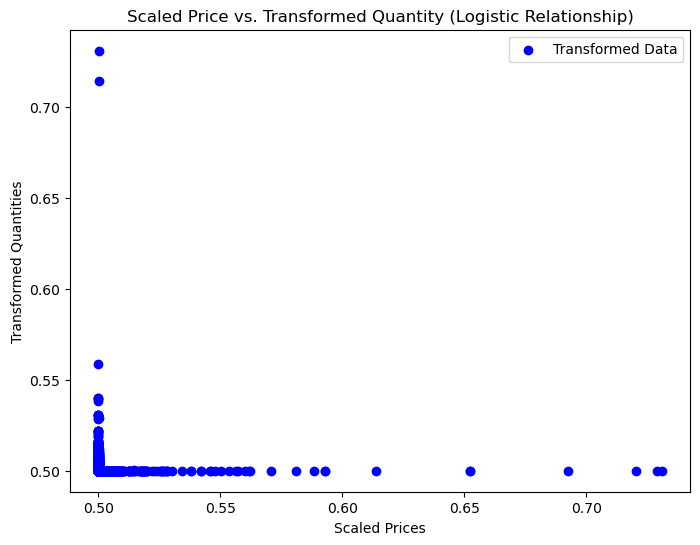

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_prices, transformed_quantities, color='blue', label='Transformed Data')
plt.xlabel('Scaled Prices')
plt.ylabel('Transformed Quantities')
plt.title('Scaled Price vs. Transformed Quantity (Logistic Relationship)')
plt.legend()
plt.show()


## Sales Data EDA

In [36]:
sales_df['Total'] = sales_df['Price'] * sales_df['Quantity']
#sales_df.drop(columns='CustomerID',inplace=True)
sales_pivot = sales_df.pivot_table(index='Month_Year',aggfunc=np.sum)
print(sales_pivot)

                 Price  Quantity        Total
Month_Year                                   
2009-12     166676.950    425276   800938.470
2010-01     129014.562    390492   637124.602
2010-02      97528.246    381689   541819.026
2010-03     166069.991    525714   789429.731
2010-04     116216.012    366456   649489.502
2010-05     119523.920    395661   645401.900
2010-06     137637.870    406557   700620.350
2010-07     117582.150    337630   638532.130
2010-08     111033.610    472010   678965.440
2010-09     145941.021    583569   888382.301
2010-10     194542.450    619613  1109500.140
2010-11     252354.892    724725  1432109.302
2010-12     156874.000    357737   776545.670
2011-01     113506.400    386785   670733.860
2011-02      95434.790    282719   508506.870
2011-03     127660.870    376285   695504.750
2011-04     105949.751    307769   525978.161
2011-05     128328.310    394689   744775.240
2011-06     121180.510    388181   739005.100
2011-07     117909.581    399394  

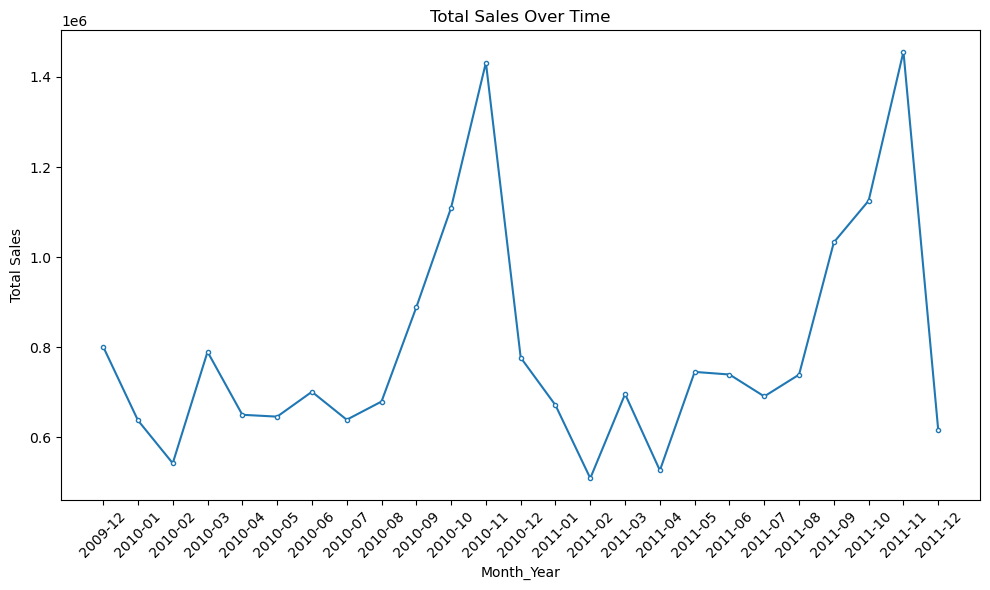

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(sales_pivot.index, sales_pivot['Total'],marker='.',markerfacecolor='white')
plt.xlabel('Month_Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

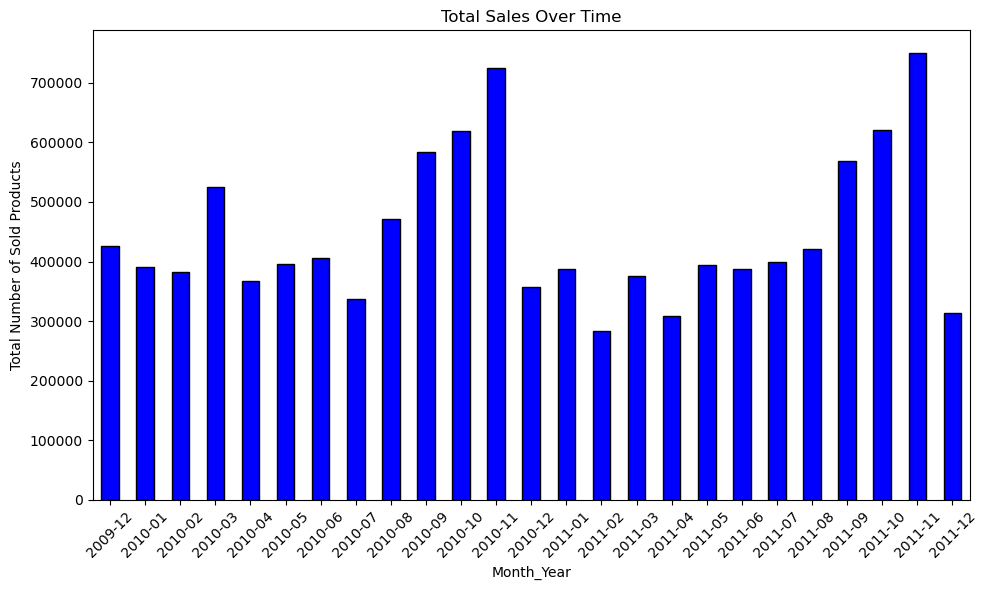

In [38]:
# Calculate the total number of sales for each month-year
sales_by_month_year = sales_df.groupby('Month_Year')['Quantity'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sales_by_month_year.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Month_Year')
plt.ylabel('Total Number of Sold Products')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
returns_df['Total'] = returns_df['Price'] * returns_df['Quantity']
#returns_df.drop(columns='CustomerID',inplace=True)
returns_pivot = returns_df.pivot_table(index='Month_Year',aggfunc=np.sum)
print(returns_pivot)

            CustomerID     Price  Quantity      Total
Month_Year                                           
2009-12     14702562.0   7933.13     -9893  -23046.43
2010-01      9738452.0  19818.71     -3603  -24639.91
2010-02      7838890.0   5636.06     -6251  -15362.74
2010-03     12003914.0  57249.40     -4380  -63399.37
2010-04      9000181.0  25971.67     -6444  -33684.99
2010-05     14103658.0   7133.11    -16547  -39811.19
2010-06     11271998.0  43590.84    -15389  -66798.12
2010-07     10520076.0  14836.82     -5956  -28531.68
2010-08      8212954.0   6239.09     -6254  -15570.77
2010-09     11298599.0  25270.21    -94245  -49318.48
2010-10     14338597.0  48652.07    -11361  -69545.31
2010-11     17345634.0   6826.78    -17609  -35591.70
2010-12     10120118.0   3354.85    -15873  -17311.89
2011-01      9916189.0   6132.06    -79759  -94229.39
2011-02      6345361.0   3937.02     -2788  -10141.80
2011-03      9449566.0   7350.00     -3797  -15235.87
2011-04      7967094.0   999

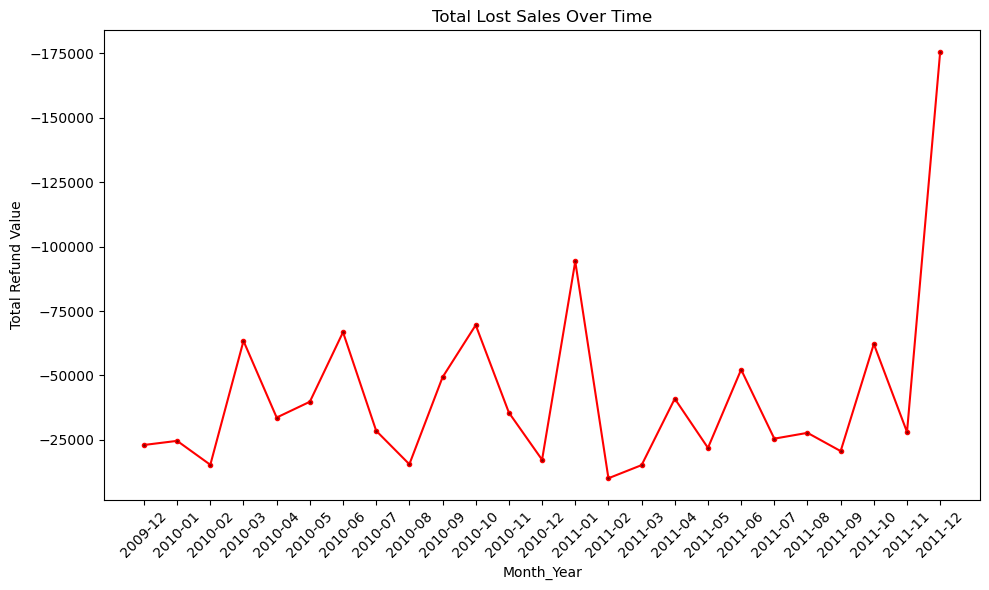

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(returns_pivot.index, returns_pivot['Total'],color='red',marker='.',markerfacecolor='maroon')
plt.xlabel('Month_Year')
plt.ylabel('Total Refund Value')
plt.title('Total Lost Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

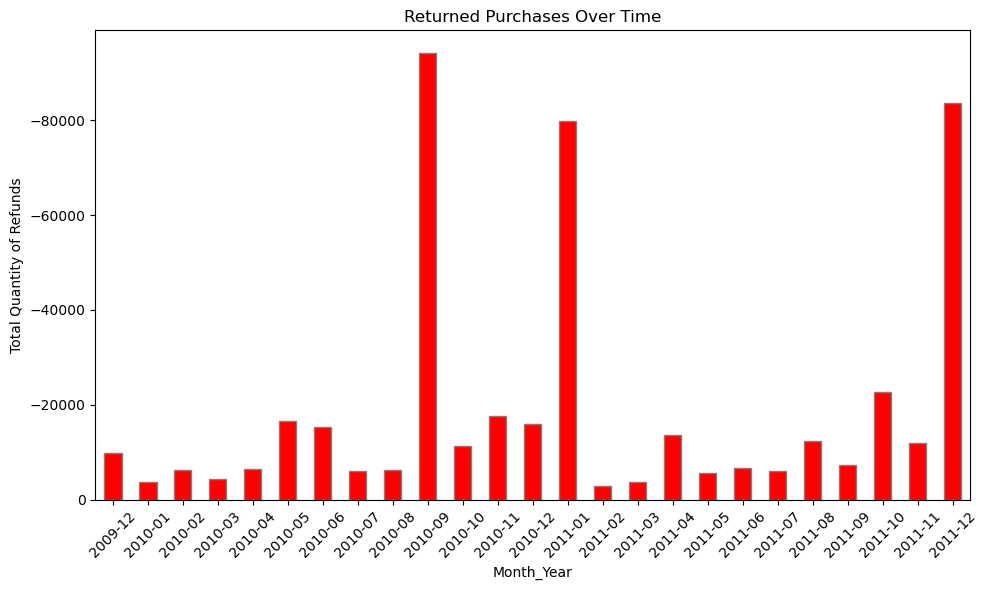

In [41]:
returns_by_month_year = returns_pivot.groupby('Month_Year')['Quantity'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
returns_by_month_year.plot(kind='bar', color='red', edgecolor='grey')
plt.xlabel('Month_Year')
plt.ylabel('Total Quantity of Refunds')
plt.title('Returned Purchases Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [42]:
df['Total'] = df['Quantity'] * abs(df['Price'])
raw_count = pd.DataFrame()
raw_count= df.pivot_table(values='CustomerID',index='Month_Year',aggfunc='count')
raw_count.rename(columns={'CustomerID': 'Number of Customer Interactions'}, inplace=True)
raw_count

,Number of Customer Interactions
Month_Year,
2009-12,44333
2010-01,30886
2010-02,28372
2010-03,40487
2010-04,33315
2010-05,34216
2010-06,38995
2010-07,32685
2010-08,32530


<Figure size 1000x600 with 0 Axes>

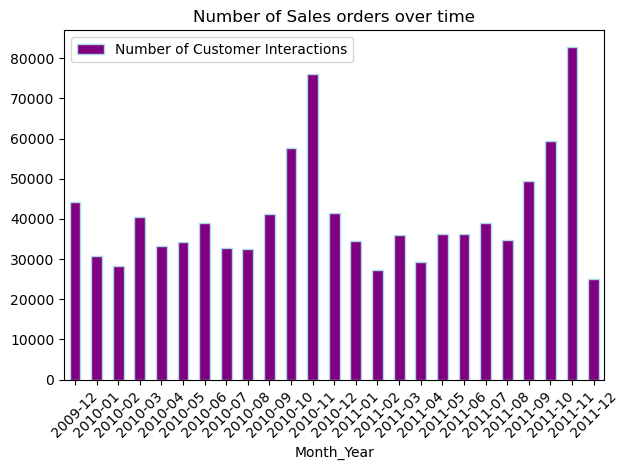

In [43]:
plt.figure(figsize=(10, 6))
raw_count.plot(kind='bar', color='purple', edgecolor='lightblue')
plt.xlabel('Month_Year')
plt.title('Number of Sales orders over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
customer_pivot = df.pivot_table(index='CustomerID',aggfunc='mean')
customer_pivot = customer_pivot.sort_values(by=['Quantity'],ascending=False)
customer_pivot.head(30)

,Price,Quantity,Total
CustomerID,,,
13902.0,0.696154,3355.200000,467.311692
16308.0,0.320000,2285.714286,731.428571
17940.0,86.812105,2240.657895,761.486316
13687.0,0.151333,1937.044444,264.018667
15118.0,0.170000,1440.000000,244.800000
15195.0,2.750000,1404.000000,3861.000000
17369.0,0.850000,1152.000000,979.200000
18052.0,0.656250,1110.375000,679.823750
13942.0,0.320000,1000.000000,320.000000


In [45]:
customer_pivot.describe(include='all')

,Price,Quantity,Total
count,8648.000000,8648.000000,8648.000000
mean,17.321646,13.928692,18.284610
std,360.726261,70.783808,332.443425
min,0.060000,-16.000000,-25111.090000
25%,2.338565,2.223371,7.109615
50%,3.212423,6.440100,13.702062
75%,4.606537,11.500000,19.647058
max,25111.090000,3355.200000,11062.060000
